<a href="https://colab.research.google.com/github/MochalovaDaria/my-progs/blob/main/%D0%9A%D0%97_%D0%9B%D0%B0%D0%B1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving рыба.jpg to рыба (20).jpg


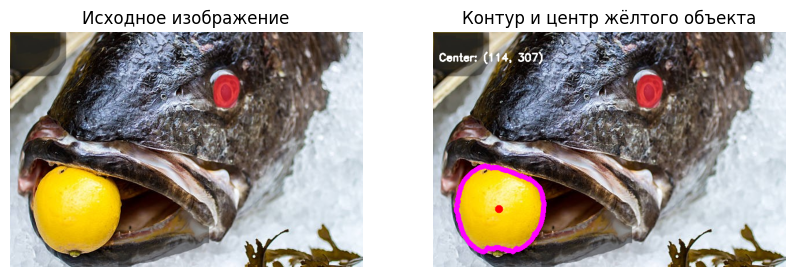

In [24]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()
image_path = next(iter(uploaded))

#Считываем кадр
frame = cv2.imread(image_path)
frame2 = cv2.imread(image_path)

#Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#Задаём пороги
low_yellow = np.array([20, 80, 110])
high_yellow = np.array([30, 255, 255])

maska = cv2.inRange(frame_HSV, low_yellow, high_yellow)
contours, hierarchy = cv2.findContours(maska, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
count = 0
for contour in contours:
  area = cv2.contourArea(contour)
  if area > 120:
    count += 1
    cv2.drawContours(frame, contour, -1, (255,0,255), 7)
    # Находим момент (центр масс) контура
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Проверяем, чтобы избежать деления на ноль
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])
      # Рисуем красную точку в центре
      cv2.circle(frame, (cX, cY), 7, (0, 0, 255), -1)  # Красный цвет (0, 0, 255)
      text = f"Center: ({cX}, {cY})"
      cv2.putText(frame, text, (10, 30 + count * 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

#Выводим кадр
plt.figure(figsize=(10, 5)) #размер в дюймах
plt.subplot(1, 2, 1)
plt.title('Исходное изображение')
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Контур и центр жёлтого объекта')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()